In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, metrics

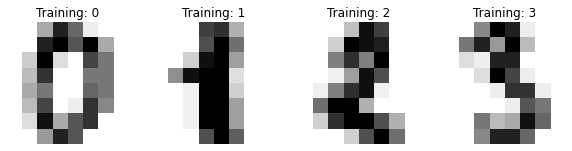

In [7]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [8]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=10, alpha=1e-4, 
                    solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)

In [11]:
X = X / 255.

In [12]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [13]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=10,
              random_state=1, solver='sgd', verbose=10)

In [14]:
predicted = mlp.predict(X_test)

In [16]:
print(f"Training set score: {mlp.score(X_train, y_train):.3f}")
print(f"Test set score: {mlp.score(X_test, y_test):.3f}")

Training set score: 0.987
Test set score: 0.970


Confusion matrix:
[[ 962    0    2    1    0    4    3    2    2    4]
 [   0 1119    5    3    0    0    3    1    4    0]
 [   5    1  991   10    4    0    5   11    4    1]
 [   0    0    6  978    1    9    0    7    1    8]
 [   1    0    3    1  948    0    6    5    0   18]
 [   2    0    1    9    1  857    8    3    7    4]
 [   5    3    2    1    5    4  938    0    0    0]
 [   0    1    5    8    1    0    0 1002    0   11]
 [   7    0    3   18    3    5    4    4  922    8]
 [   2    2    0    4    8    3    0    6    1  983]]


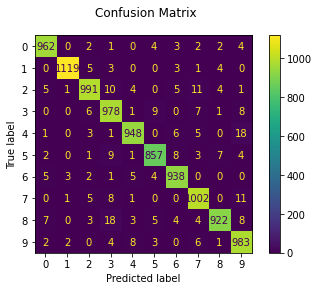

In [17]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

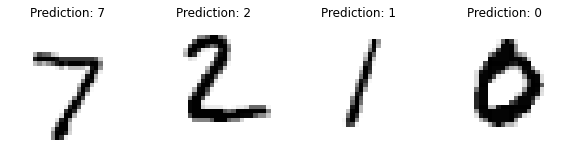

In [25]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test.values, predicted):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")